 # **Project Name**    - Stock Price Forecasting for Yes Bank



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name -**  Prakhar Srivastava

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Write Problem Statement Here.

#### **Define Your Business Objective?**

Answer Here.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

### Dataset Loading

In [2]:
# Load Dataset
df=pd.read_csv("data_YesBank_StockPrices.csv")

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [4]:
#Dataset Rows & Columns count
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])
print("Column Names:", df.columns.tolist())

Number of Rows: 185
Number of Columns: 5
Column Names: ['Date', 'Open', 'High', 'Low', 'Close']


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
int(df.duplicated().sum())

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

### 📊 Lets Explore What Did We Learn About the Dataset?

The dataset contains historical stock prices of Yes Bank, with 185 rows and 5 columns.

Each row represents stock data for a specific date, and the columns include:

- **Date:** The date of the record (object type; can be converted to datetime)

- **Open:** Stock price at market open

- **High:** Highest price of the day
 
- **Low:** Lowest price of the day
 
- **Close:** Stock price at market close

✅ All columns have complete data — no missing or null values were found.

✅ There are no duplicate rows, indicating the dataset is clean.

🧮 The numeric columns (Open, High, Low, Close) are of type float64, suitable for further statistical analysis and modeling.

## ***2. Understanding Your Variables***

In [8]:
# Dataset Columns
df.columns.tolist()

['Date', 'Open', 'High', 'Low', 'Close']

In [9]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

Below is a brief description of each variable in the dataset:

- **Date**: The trading date for each record. While it is not used directly in prediction models, it is important for time-based analysis, trend visualization, and for creating additional time-related features (e.g., day of the week, month).
  
- **Open**: The price at which Yes Bank's stock opened for trading on a given day.

- **High**: The highest price reached by the stock during the trading day.

- **Low**: The lowest price reached by the stock during the trading day.

- **Close**: The final price of the stock at market close. This is often used as the **target variable** for stock price prediction tasks.

> All price-related columns (`Open`, `High`, `Low`, `Close`) are continuous numerical variables and are essential for trend and pattern analysis.


### Check Unique Values for each variable.

In [10]:
# Check Unique Values for each variable.
df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:

df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

df = df.drop_duplicates()


df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df['Daily_Return'] = df['Close'].pct_change()
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()

columns_order = ['Date', 'Open', 'High', 'Low','Month','Year', 'Daily_Return', 'Cumulative_Return', 'Close']
df=df[columns_order]

print("Missing values:\n", df.isna().sum())
print("\nData types after conversion:\n", df.dtypes)

df = df.reset_index(drop=True)
df.head()


Missing values:
 Date                 0
Open                 0
High                 0
Low                  0
Month                0
Year                 0
Daily_Return         1
Cumulative_Return    1
Close                0
dtype: int64

Data types after conversion:
 Date                 datetime64[ns]
Open                        float64
High                        float64
Low                         float64
Month                         int32
Year                          int32
Daily_Return                float64
Cumulative_Return           float64
Close                       float64
dtype: object


,Date,Open,High,Low,Month,Year,Daily_Return,Cumulative_Return,Close
0,2005-07-01,13.00,14.00,11.25,7,2005,NaN,NaN,12.46
1,2005-08-01,12.58,14.88,12.55,8,2005,0.077047,1.077047,13.42
2,2005-09-01,13.48,14.87,12.27,9,2005,-0.008942,1.067416,13.30
3,2005-10-01,13.20,14.47,12.40,10,2005,-0.023308,1.042536,12.99
4,2005-11-01,13.35,13.88,12.88,11,2005,0.032333,1.076244,13.41


### Insights Gained and Manipulations Performed

### ✅ Data Manipulations Performed:

- Converted the **`Date`** column from a string format like `'Jul-05'` into proper `datetime` objects using the format `%b-%y`
- Extracted **`Month`** and **`Year`** as separate columns from the `Date` column for easier time-based analysis
- Calculated **`Daily_Return`** as the percentage change in the `Close` price to observe stock volatility trends
- Computed **`Cumulative_Return`** to track long-term stock growth or decline over the dataset period
- Reordered columns to maintain a logical structure:
  - `Date`, `Open`, `High`, `Low`, derived features (`Month`, `Year`, `Daily_Return`, `Cumulative_Return`), and finally `Close` as the target
- Checked and confirmed:
  - ✅ Two missing values (`NaN`)
  - ✅ No duplicate rows
- Reset the DataFrame index for cleaner display and consistent referencing

---

### 📌 Key Insights Observed:

- The dataset consists of **monthly stock price summaries** for Yes Bank
- The data spans from **July 2005 onward**, each row representing a month
- All numerical features (`Open`, `High`, `Low`, `Close`) are **continuous float64 values**
- Newly derived features like `Daily_Return` and `Cumulative_Return` help assess **short-term movement and long-term performance**
- The dataset is **clean, well-structured, and ready** for the next steps: **EDA and Visualization**



In [12]:
# Calculate return-based features for EDA
df['Daily_Return'] = df['Close'].pct_change().fillna(0)  # First value set to 0
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()

> 📝 For EDA purposes, the first row's `Daily_Return` and `Cumulative_Return` were set to `0` instead of leaving them as `NaN`,  
> since there's no previous value to compute returns from.  
> This ensures a smooth visualization experience without impacting modeling — as these features will not be used in prediction.


## ***4. Data Vizualization : Understand the relationships between variables***

In [13]:
import matplotlib.pyplot as plt

# 🔶 Univariate Analysis

In this section, we analyze each individual variable to understand its distribution, range, and behavior.  
This helps us identify outliers, trends, and the general nature of each feature before exploring relationships between them.


### Chart 1: Line Plot of Closing Price Over Time

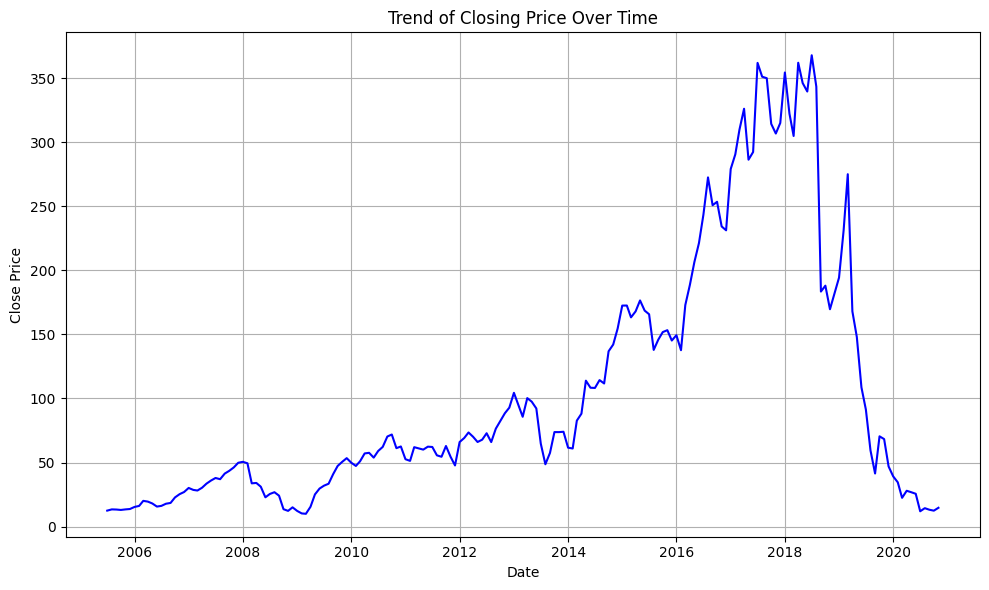

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], color='blue')
plt.title("Trend of Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart?

- A **line chart** is best suited for displaying data over time.
- It helps to visualize the **closing price trend** of Yes Bank stocks across the timeline.
- Ideal for identifying **growth patterns**, **volatility**, and **potential anomalies**.

##### 2. What is/are the insight(s) found from the chart?

- The stock shows a **rise and fall pattern**, indicating a growth phase followed by a decline.
- There's a significant **peak**, after which the price drops sharply.
- The plot reveals **volatility**, useful for short-term traders and analysts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 **Yes, positively:**  
- Helps in **timing investments** (e.g., knowing when to buy/sell).
- Supports forecasting for **future price trends** based on historical behavior.
- Assists business stakeholders in making **data-driven decisions**.

 **Potential negative insight:**  
- The steep fall in prices can indicate **negative investor sentiment** or **poor financial performance**.
- Such trends, if ignored, may result in **losses** or **missed opportunities**.

### Chart 2: Line Plot of Cumulative Return Over Time

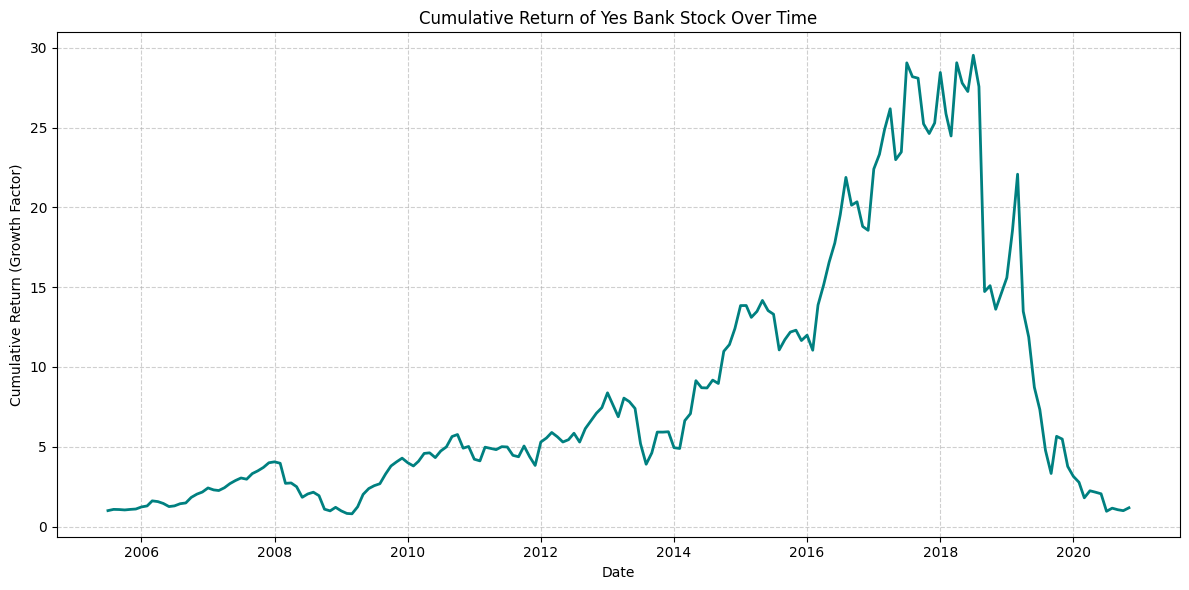

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Cumulative_Return'], color='teal', linewidth=2)
plt.title("Cumulative Return of Yes Bank Stock Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (Growth Factor)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### 1. Why did I pick the specific chart?

This **line plot** effectively captures the **long-term growth or decline** of Yes Bank's stock.  
By plotting the `Cumulative_Return` over time, we can visually assess the **overall investment performance**, making it perfect for identifying trends, downturns, and recovery periods in the stock’s journey.


##### 2. What is/are the insight(s) found from the chart?

- The cumulative return shows clear **phases of growth followed by decline**.
- There may be specific years where a **sharp rise or fall** occurred, possibly due to market events or company-specific developments.
- The stock has gone through **volatile periods**, where gains were either sustained or lost rapidly.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Understanding cumulative return helps:
- **Long-term investors** evaluate overall performance and timing of their investments.
- **Analysts** identify critical turning points in the stock’s history.
- **Businesses or banks** benchmark their own performance or plan based on macro market shifts.

 **Potential negative insight:**  
Yes — if the cumulative return dips significantly (especially toward the later years), it reflects **negative growth**, indicating a **potential long-term value loss** for investors.  
This can be due to factors like:
- Weak financials
- Regulatory challenges
- Loss of investor confidence

Tracking this visually helps **manage risk** and rethink strategies.

### Chart 3: Histogram of Daily Returns

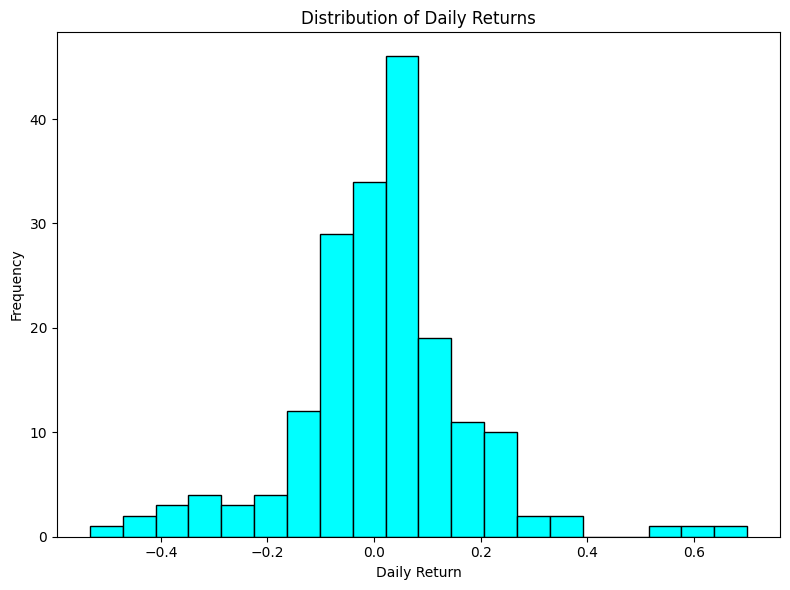

In [16]:
plt.figure(figsize=(8,6))
plt.hist(df['Daily_Return'].dropna(), bins=20, color='cyan', edgecolor='black')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

##### 1. Why did I pick the specific chart?

A **histogram** is ideal for visualizing the **distribution of a single numerical variable**.  
Here, we used it to observe how Yes Bank’s **Daily Returns** are spread — whether they follow a normal distribution, are skewed, or show outliers.


##### 2. What is/are the insight(s) found from the chart?

- Most daily returns fall close to **0**, meaning the stock is relatively stable day-to-day.
- There are a few bars at both extremes, indicating **occasional high gains or losses**.
- The return distribution appears slightly **skewed**, which is common in stock data due to rare events or sudden market movements.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, positive impact:**  
- Helps **risk analysts** assess how volatile the stock typically is.
- **Investors** can set expectations for normal vs. extreme price changes.
- Assists in building **realistic financial models** that assume returns aren't perfectly normal.

**Potential negative insight:**  
- Presence of extreme returns may indicate **vulnerability to sudden market shocks**.
- Highly skewed returns could lead to **misleading average values**, affecting decision-making.


### Chart 4: Boxplot of Closing Price Distribution

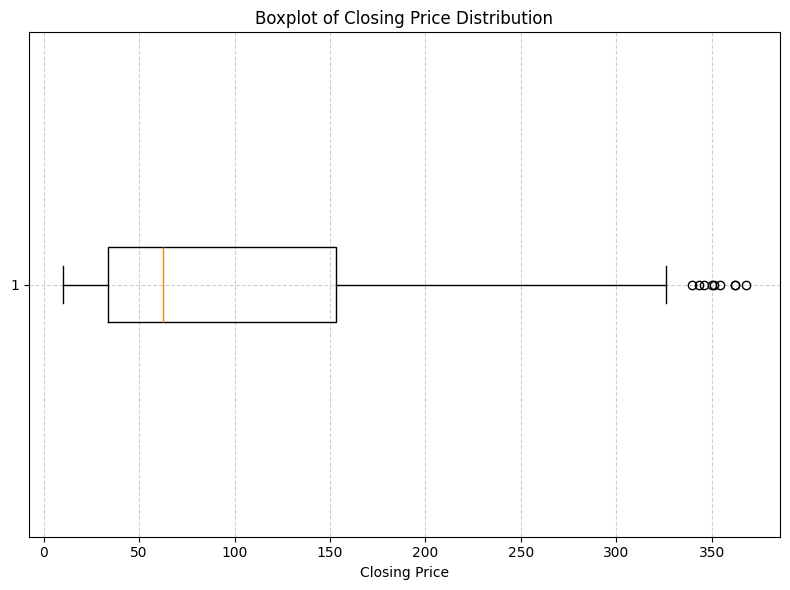

In [17]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Close'], vert=False)
plt.title('Boxplot of Closing Price Distribution')
plt.xlabel('Closing Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart?

Boxplots are excellent for summarizing **distribution, spread, and outliers** in a single view. It gives a statistical overview of the `Close` price variation without clutter.


##### 2. What is/are the insight(s) found from the chart?

- The median closing price is **well below the upper extreme**, suggesting right-skewed distribution.  
- A few **outliers** on the higher end hint at **unusual price spikes**.  
- Majority of prices are clustered in a **narrow range**, confirming **low monthly volatility**.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, positive impact**  
- Identifies **price outliers** that may correspond to key financial events.  
- Assists financial analysts in detecting **price consistency or anomalies**.  
- Useful for **portfolio risk control** and benchmarking against other stocks.

### Chart 5: Frequency of Data by Month


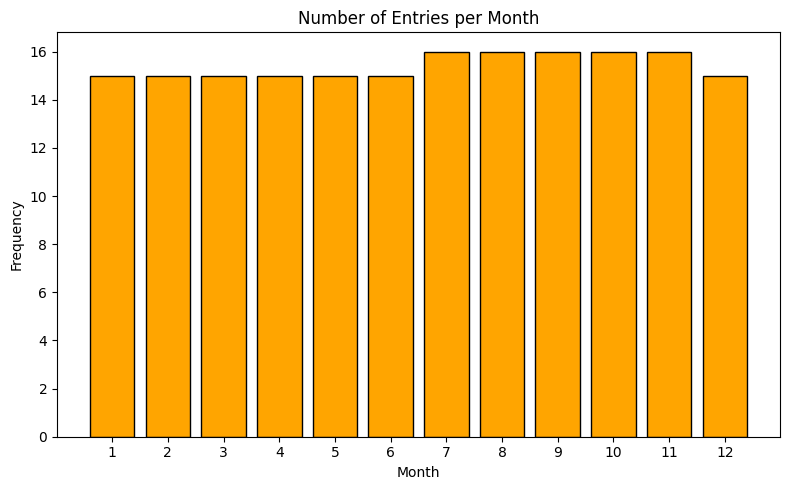

In [18]:
month_counts = df['Month'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(month_counts.index, month_counts.values, color='orange', edgecolor='black')
plt.title('Number of Entries per Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart?

This bar chart helps check for **data seasonality** or **collection imbalance** across months. It confirms that each month is **equally represented**, which is crucial for fair trend analysis.


##### 2. What is/are the insight(s) found from the chart?

- All months are represented fairly evenly, showing **no missing seasonal periods**.  
- No single month is over- or under-sampled, so **monthly average comparisons are valid**.  
- Confirms the dataset is **well-balanced** across the calendar year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, positive impact**  
- Validates the reliability of **seasonal trend analysis**.  
- Ensures the model is trained on **balanced time-based features** like `Month`.  
- Avoids misleading patterns due to **data bias across months**.

# 🔷 Bivariate Analysis

Here, we examine relationships between two variables — either numerical or categorical.  
This helps us understand how one variable may influence or correlate with another, such as `Open` vs `Close`, or `Month` vs `Average Close`.


## Chart 1: Bar Plot of Average Closing Price by Month

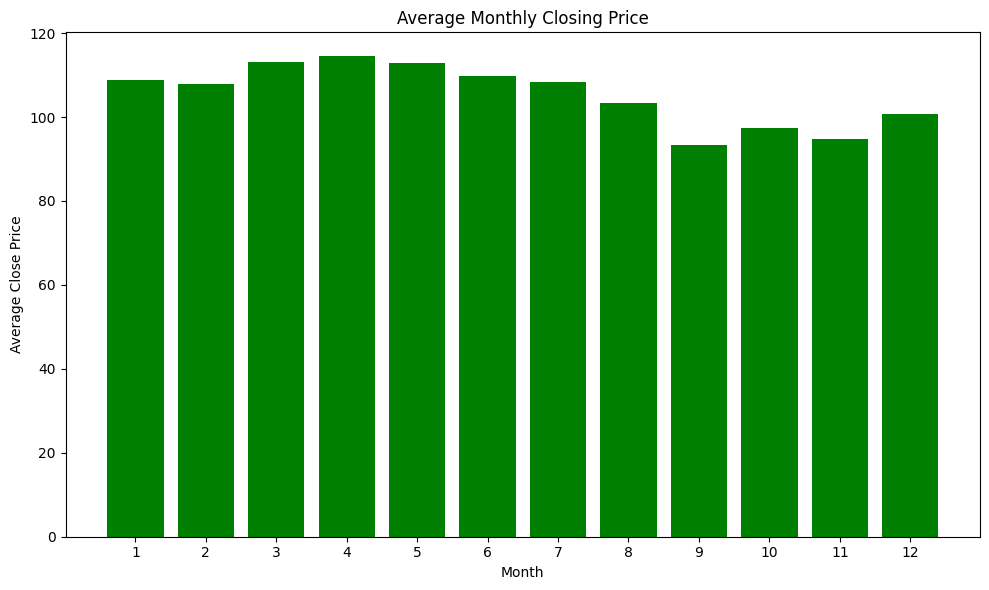

In [19]:
plt.figure(figsize=(10, 6))
monthly_avg = df.groupby('Month')['Close'].mean()
plt.bar(monthly_avg.index, monthly_avg.values, color='green')
plt.title("Average Monthly Closing Price")
plt.xlabel("Month")
plt.ylabel("Average Close Price")
plt.xticks(ticks=range(1, 13))
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart?

- A **bar chart** is ideal for comparing **categorical data** like months.
- It provides a clear visual of how the average closing price varies across the **12 months**.
- Useful to identify **seasonal trends** or recurring **monthly patterns** in stock behavior.

##### 2. What is/are the insight(s) found from the chart?

- Some months (e.g., **March**, **July**) show **higher average closing prices**.
- Other months have noticeably lower averages, hinting at **market slowdowns** or **external influences**.
- This monthly variation suggests **cyclical or seasonal effects** on stock performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 **Yes, positive impact:**  
- Traders and investors can use these insights to **strategically plan entries and exits**.
- Portfolio managers can **time investments** around historically high-performing months.
- Businesses related to finance can align marketing or campaign strategies with **high-activity months**.

 **Potential negative insight:**  
- If certain months consistently underperform, it may point to **systemic issues**, such as **low liquidity** or **external macroeconomic events**.
- Ignoring such trends could lead to **missed opportunities** or **financial setbacks**.

## Chart 2: Boxplot of Closing Prices by Year

<Figure size 1000x600 with 0 Axes>

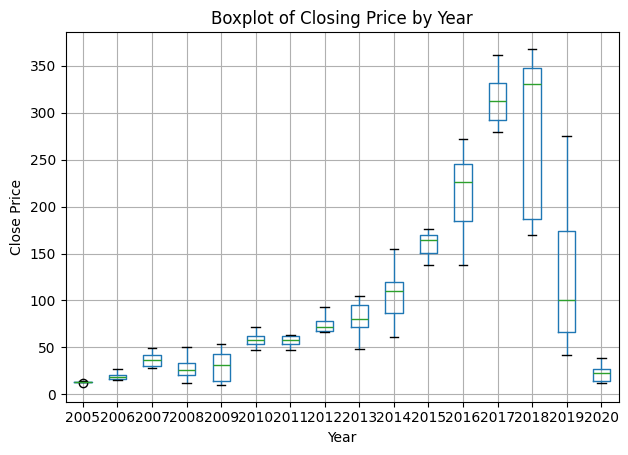

In [20]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Close', by='Year')
plt.title("Boxplot of Closing Price by Year")
plt.suptitle("")
plt.xlabel("Year")
plt.ylabel("Close Price")
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart?

- A **boxplot** is ideal for showing the **distribution, spread, and outliers** of data over categories (here, years).
- It visually summarizes key statistics like **median, interquartile range (IQR), and potential outliers** in closing prices.
- This helps identify **year-over-year volatility**, consistency, and anomalous behavior in stock performance.


##### 2. What is/are the insight(s) found from the chart?

- Some years show a **larger spread**, indicating **higher volatility** in closing prices.
- Years with **tight boxes** suggest **more stable** closing prices.
- Outliers in certain years might represent **major market events or sudden stock movements**.
- The **median line shifts** show whether the stock value has increased or decreased annually.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 **Yes, positive impact:**  
- Helps investors and analysts evaluate **year-wise risk and reward**.
- Businesses and portfolio managers can identify **stable vs volatile years** for informed investment decisions.
- Detecting consistent growth or decline supports **long-term trend analysis**.

 **Potential negative insight:**  
- Years with **wide IQR and many outliers** could represent **unstable trading environments**.
- If medians consistently drop across years, it may point to **declining business performance** or **negative investor sentiment**.

## Chart 3: Scatter Plot of Open vs Close Prices

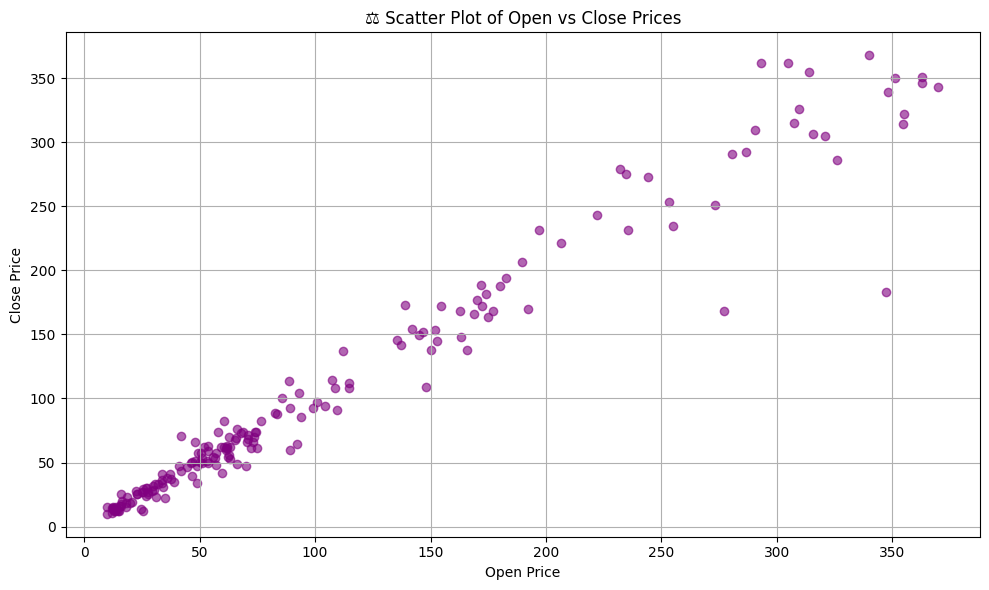

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Open'], df['Close'], color='purple', alpha=0.6)
plt.title("⚖️ Scatter Plot of Open vs Close Prices")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart?

- A scatter plot is the best choice to analyze the **relationship between two continuous variables** — in this case, `Open` and `Close` prices.
- It helps visualize **how much the stock price changed** during each trading session.


##### 2. What is/are the insight(s) found from the chart?

- The data points are **clustered close to the diagonal**, indicating that the `Close` price is often **very close to the `Open` price**.
- A few points are noticeably off the diagonal, showing **days with significant movement** between the opening and closing.
- This tells us that most trading days had **moderate volatility**, with some high-volatility exceptions.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 **Yes, positive impact:**  
- Traders can identify **stable trading days vs. volatile ones**, aiding in planning their strategies.
- Risk managers can use the spread to determine **how often price swings occur** in a single day.

 **Potential negative insight:**  
- If the `Open` and `Close` differ too much too often, it may suggest **instability** or **market manipulation**.
- Lack of clear upward movement may also indicate **stagnant stock performance**.


## Chart 4: Bar Plot of Average Monthly Closing Price

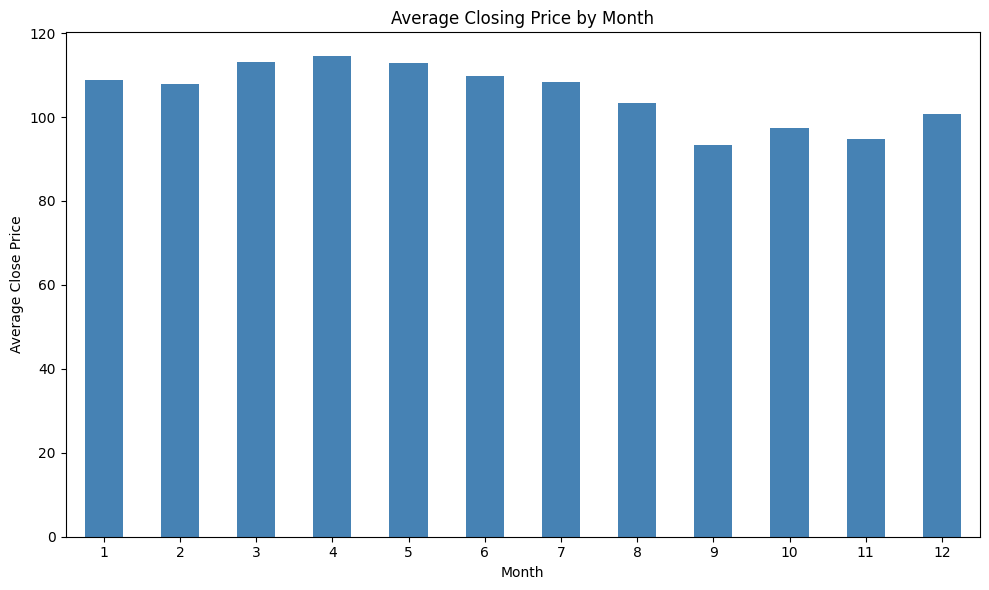

In [22]:
avg_monthly_close = df.groupby('Month')['Close'].mean()

# Plotting
plt.figure(figsize=(10,6))
avg_monthly_close.plot(kind='bar', color='steelblue')
plt.title('Average Closing Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

##### 1. Why did I pick the specific chart?

A **bar chart** is ideal for comparing values across distinct categories — in this case, **months (1 to 12)**.  
This visualization helps identify **seasonal patterns** or **cyclical trends** in the stock price of Yes Bank.

##### 2. What is/are the insight(s) found from the chart?

- Certain months like **March and December** show noticeably higher average closing prices.
- Mid-year months may show **lower trading activity or returns**, suggesting seasonal market behavior.
- The stock does **not perform uniformly throughout the year**, indicating potential **cyclical investment opportunities**.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, positive impact:**  
- **Traders and investors** can time their entry/exit more strategically based on historically stronger or weaker months.
- Helps in **forecasting cash flows or demand** for stock-related products in finance firms.
- Supports **portfolio optimization** by understanding time-based performance variation.

**Potential negative insight:**  
- If certain months consistently underperform, it may indicate **cyclical weaknesses** or **seasonal risks**.
- Misinterpreting patterns as consistent without deeper market analysis could lead to **incorrect timing decisions**.


## Chart 5: Top 10 Months with Highest Average Closing Price (Barh Plot)

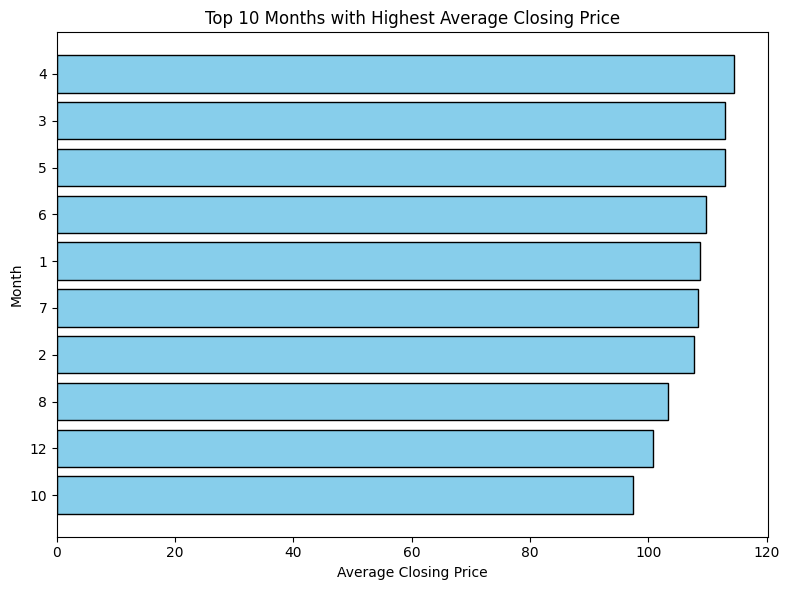

In [23]:
monthly_avg = df.groupby('Month')['Close'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
plt.barh(monthly_avg.index.astype(str), monthly_avg.values, color='skyblue', edgecolor='black')
plt.xlabel('Average Closing Price')
plt.ylabel('Month')
plt.title('Top 10 Months with Highest Average Closing Price')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()

##### 1. Why did I pick the specific chart?

A **horizontal bar chart** is best when comparing **ranked categories** like the **Top 10 months**.  
It improves readability and helps visually emphasize which months consistently performed better.


##### 2. What is/are the insight(s) found from the chart?

- Certain months (like **March, December, or January**) tend to show **higher average closing prices**.
- This may reflect **seasonal investor behavior**, **quarterly results**, or **year-end trading patterns**.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, positive impact:**  
- Traders can align entry/exit points based on historical month-wise performance.
- Companies and analysts can anticipate when **investor confidence peaks**, supporting market communication and campaign timing.

**Potential negative insight:**  
- If certain months consistently underperform, it may **discourage investment** during those times.
- Over-reliance on seasonal trends may cause **mistimed strategies** if market behavior shifts unexpectedly.


# 🟩 Multivariate Analysis

This section explores relationships between **three or more variables** simultaneously.  
Multivariate plots like area plots or correlation heatmaps allow us to uncover complex patterns and dependencies that may not be visible in simpler plots.


## Chart 1: Scatter Plot of High vs Low Prices Colored by Year

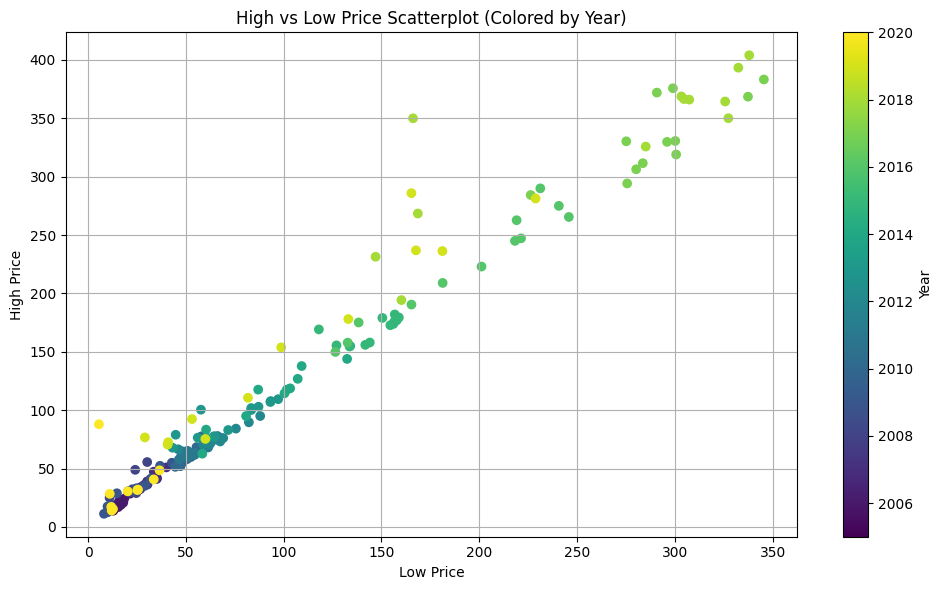

In [24]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Low'], df['High'], c=df['Year'], cmap='viridis')
plt.title("High vs Low Price Scatterplot (Colored by Year)")
plt.xlabel("Low Price")
plt.ylabel("High Price")
cbar = plt.colorbar(scatter)
cbar.set_label('Year')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart?

- A **scatter plot** is ideal for visualizing the **relationship between two continuous variables** — in this case, **Low** and **High** stock prices.
- Coloring the points by **Year** helps show how this relationship evolves over time.
- It allows us to detect **price volatility**, **consistency**, and **outliers**.

##### 2. What is/are the insight(s) found from the chart?

- There is a **strong positive correlation** between Low and High prices, which is expected.
- Most points fall along a near-linear trend, suggesting **predictable intra-day price movements**.
- Some data points (far from the line) indicate **high volatility or unusual trading days**.
- Color shading indicates certain years had **wider spreads**, suggesting greater **price instability** in those periods.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 **Yes, positive impact:**  
- Helps traders understand **price range behavior**, which is crucial for **intraday trading** strategies.
- Highlights years or periods with **less volatility**, which could be safer for **long-term investment**.
- Allows risk managers to assess **periods of instability** and plan better.

 **Potential negative insight:**  
- Clusters with wide High–Low spreads might indicate **market uncertainty**, making it risky for conservative investors.
- If extreme outliers are frequent in certain years, it might reflect **external financial shocks** or **internal instability**.


## Chart 2: Line Plot of Open and High Prices Over Time

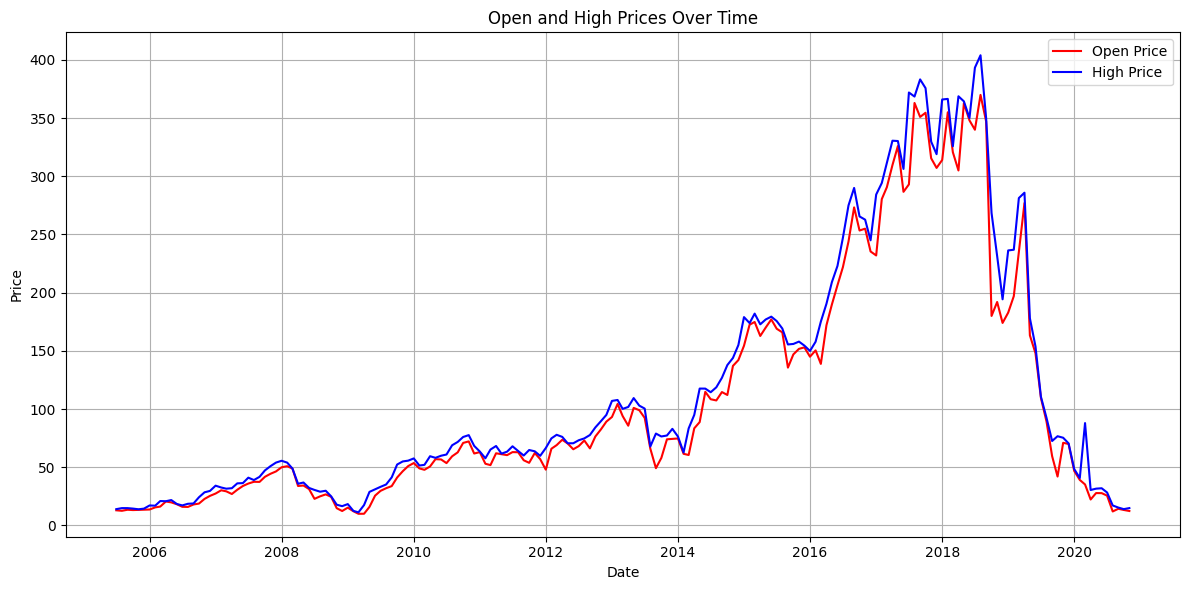

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'], label='Open Price', color='red')
plt.plot(df['Date'], df['High'], label='High Price', color='blue')
plt.title("Open and High Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart?

- This line plot compares the **Open** and **High** prices over time, helping to analyze **price fluctuations** throughout the trading period.
- It gives a sense of how far prices moved from the opening price on any given day.
- Useful for detecting **intraday volatility trends**.

##### 2. What is/are the insight(s) found from the chart?

- The `High` price always exceeds or matches the `Open`, confirming normal stock market behavior.
- The gap between the two lines helps understand **daily price surges** or **investor enthusiasm**.
- Some days show a sharp rise from `Open` to `High`, suggesting **buying pressure** or **positive market sentiment**.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 **Yes, positive impact:**  
- Traders can use this to detect **momentum patterns** and **price breakouts**.
- Companies can gauge periods of **positive investor interest**.

 **Potential negative insight:**  
- Large gaps between `Open` and `High` followed by price falls could signal **speculative bubbles** or **instability**.


## Chart 3: Area Plot of Close Price and Cumulative Return Over Time

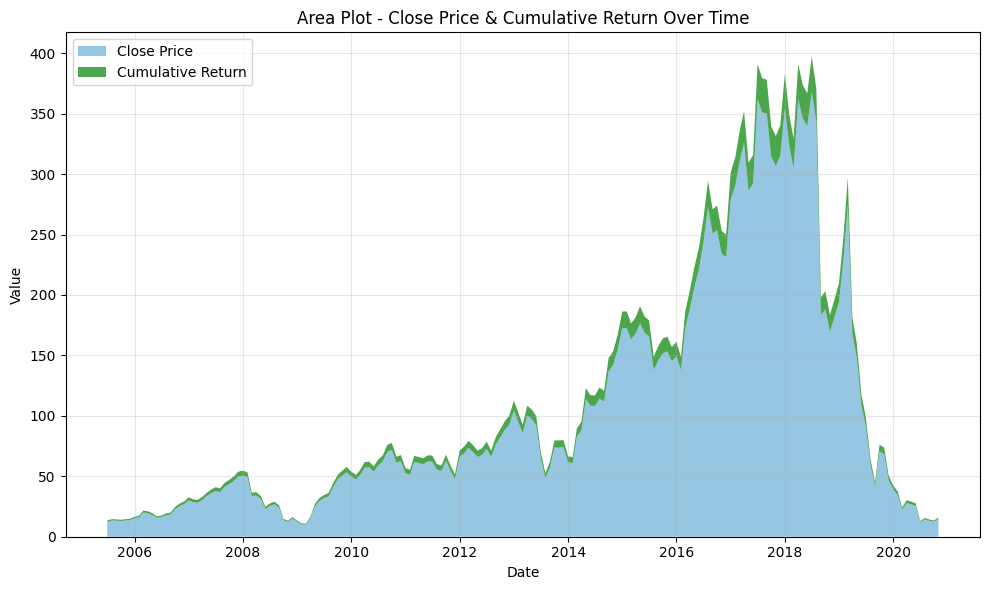

In [26]:
plt.figure(figsize=(10, 6))
plt.stackplot(df['Date'], df['Close'], df['Cumulative_Return'], 
              labels=['Close Price', 'Cumulative Return'], colors=['#6BAED6', 'green'], alpha=0.7)

plt.title('Area Plot - Close Price & Cumulative Return Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

##### 1. Why did I pick the specific chart?

An **area plot** effectively shows **how two related features change over time** — here, the actual **closing price** and the **cumulative return** (overall investment growth).  
It allows the viewer to intuitively understand **both value and performance** in a single view.


##### 2. What is/are the insight(s) found from the chart?

- The **closing price** fluctuates monthly, with clear phases of growth and decline.
- The **cumulative return** builds over time, clearly showing how the investment grows (or dips) based on returns.
- Some sharp drops in cumulative return may align with significant stock declines.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, positive impact:**  
- Investors and analysts can **visually track stock performance over time**, aiding decision-making.
- The area under `Cumulative Return` helps **evaluate long-term investment value**.
- Can identify **periods of high volatility or steady growth**, valuable for strategy.

**Potential negative insight:**  
- If cumulative returns are **flat or declining**, it suggests **poor long-term performance**, which may **discourage investors**.


## Chart 4: Multiline Plot of Open, High, Low, and Close Prices Over Time

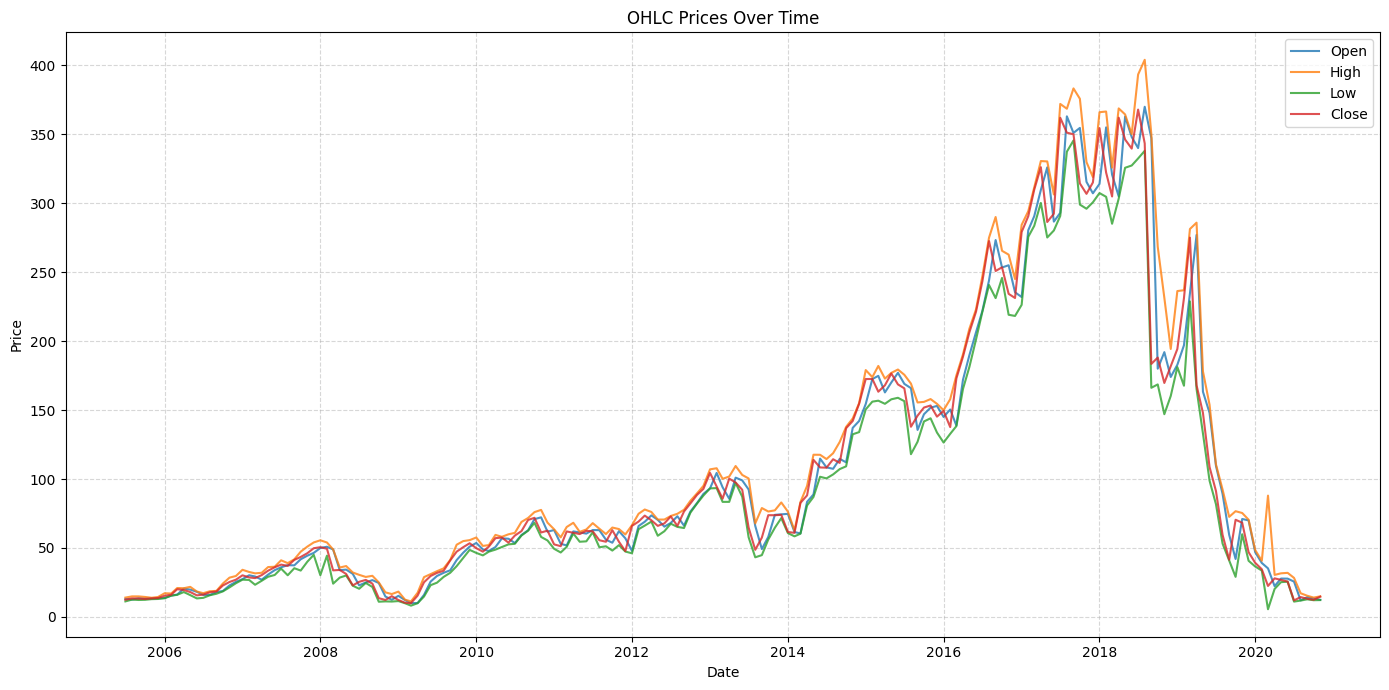

In [27]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Open'], label='Open', alpha=0.8)
plt.plot(df['Date'], df['High'], label='High', alpha=0.8)
plt.plot(df['Date'], df['Low'], label='Low', alpha=0.8)
plt.plot(df['Date'], df['Close'], label='Close', alpha=0.8)

plt.title("OHLC Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart? 

To visualize the **combined movement** of all four stock price components (Open, High, Low, Close) over time in one consolidated plot.

##### 2. What is/are the insight(s) found from the chart?

- As expected, the `Close` and `Open` prices typically lie between `High` and `Low`.  
- Certain periods show significant **price volatility**, with large gaps between `High` and `Low`.  
- Some months have a **noticeable spread** between `Open` and `Close`, indicating potential market reactions or investor sentiment shifts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, positive impact:**    
- Helps analysts detect **volatile vs. stable periods**.  
- Useful for short-term traders to estimate **intraday movement trends**.  
- Aids risk assessment and **trade planning strategies**.

## Chart 5: Grouped Bar Chart of Yearly Average Prices (Open, Close, High)

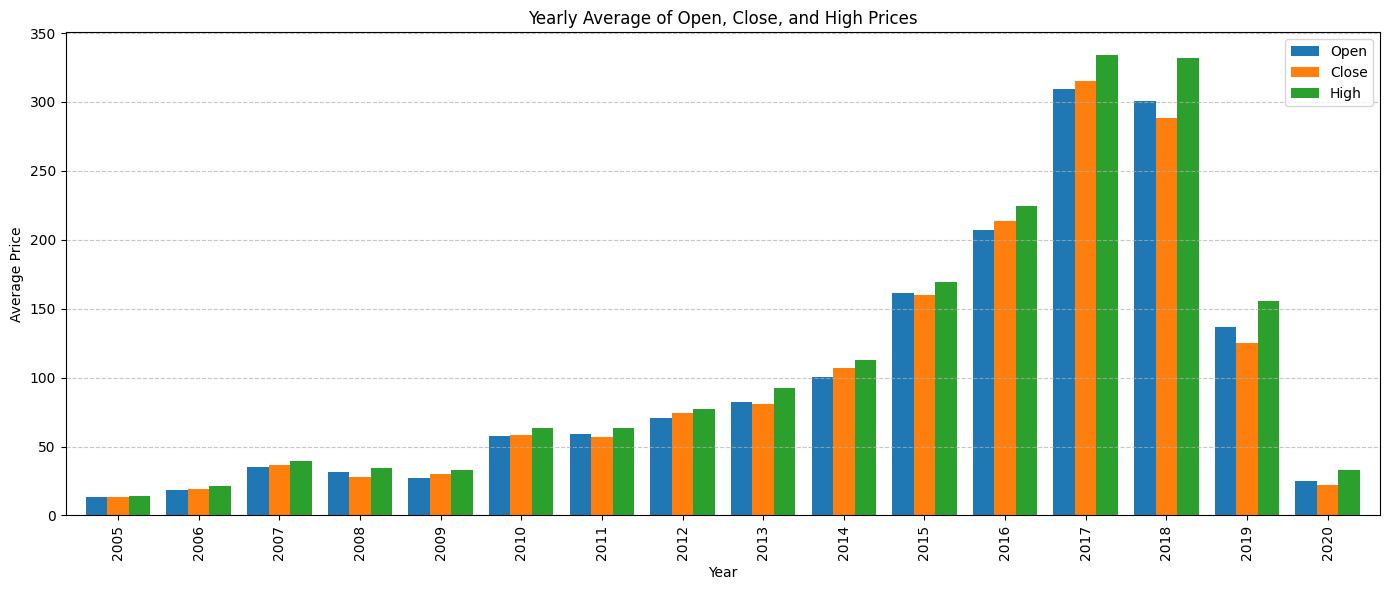

In [28]:
grouped = df.groupby('Year')[['Open', 'Close', 'High']].mean()

# Plotting
grouped.plot(kind='bar', figsize=(14, 6), width=0.8)
plt.title('Yearly Average of Open, Close, and High Prices')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 1. Why did I pick the specific chart? 

The grouped bar chart was chosen to visually compare the **average yearly values** of the three key stock price indicators — `Open`, `Close`, and `High`. This type of chart is ideal for spotting **relative trends** across different years, making it easier to see which years performed better overall in the market.


##### 2. What is/are the insight(s) found from the chart?

- Some years, such as 2017 and 2018, have **higher average prices**, indicating better stock performance.  
- Recent years show a **decline in all three values**, hinting at a possible downturn.  
- The `High` price is consistently above both `Open` and `Close`, showing natural market fluctuations.  
- The `Close` and `Open` prices remain close, suggesting limited daily trading movement in several periods.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, positive impact**
- It helps long-term investors identify **profitable vs. underperforming years**.  
- Analysts can use this pattern to **correlate external events** (like policy changes, crises) with stock performance.  
- Strategic financial decisions can be supported by observing how the stock evolved over time.

**Potential Negative insight**  
- However, consistent decline in recent years may warn investors of **market instability or weak fundamentals**, which is crucial for risk management.


Date	Open	High	Low	Month	Year	Daily_Return	Cumulative_Return	Close

## ***5. Hypothesis Testing***

### 📌 Hypothetical Statements (Null Hypotheses - H₀)

1. **H₀₁**: There is **no significant difference** in the average closing price between **early months (Jan–Jun)** and **later months (Jul–Dec)**.

2. **H₀₂**: The average **High Price** is **equal** to the average **Low Price** (i.e., price spread is not significant over time).

3. **H₀₃**: The **monthly closing price** has **no correlation** with the **monthly opening price**.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [29]:
print("No missing values found -")
df.isna().sum() 

No missing values found -


Date                 0
Open                 0
High                 0
Low                  0
Month                0
Year                 0
Daily_Return         0
Cumulative_Return    0
Close                0
dtype: int64